<a href="https://colab.research.google.com/github/min03027/IT-DA-DeepLearning/blob/main/chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#신경망의 예 
입력층(0층) : 가장 왼쪽 줄
은닉층(1층) : 중간 줄 
출력층(2층) : 맨 오른 쪽 줄

#퍼셉트론 복습
네트워트에서는 편향 b가 보이지 않는다. 
퍼셉트론에서는 3개의 신호가 입력되고, 각 신호에 가중치를 곱한 후, 다음 뉴련에게 전달 된다. 다음 뉴런에서는 이 신호의 값들을 더하여 그 합이 0을 넘으면 1을 출력하고 그렇지 않느면 0을 출력한다. 
즉, 0을 넘으면 1 출력, 넘지 않으면 0 출력

#활성화 함수의 등장 
활성화 함수 
: 입력신호의 총합을 출력신호로 변환하는 함수 
입력신호의 총합이 활성화를 일으키는지를 정함.

[식 3.2]
가중치가 곱해진 입력 신호의 총합을 계산, 그 합을 활성화 함수에 입력 > 결과 

뉴런 = 노드
추가) 단순 퍼셉트론 : 단층 네트워트에서 계단함수를(임계값을 결계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델
다층 퍼셉트론 : 신경망 (여러층으로 구성되고 시그모이드 함 수 등 활성과 함수를 사용하는 네트워크)

퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다. 
but? 신경망에서는 계단 함수대신 다른 활성화 함수를 사용

#시그모이드 함수 
신경망에서는 활성화 함수로 계단함수 대신 시그모이드 함수를 사용한다. 

#계단함수 구현하기
입력이 0을 넘으면 1을 출력하고 
넘지 않으면 0을 출력하는 함수

In [ ]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

이는 실수(부동소수점)만 받아들임
따라서 넘파이 배열을 넣고 싶을 때에는 ?

In [ ]:
def step_function(x):
  y = x > 0
  return y.astype(np.int)

In [ ]:
import numpy as np
x = np.array([-1,0,1.0,2.0])
x

array([-1.,  0.,  1.,  2.])

In [ ]:
y = x>0
y

array([False, False,  True,  True])

bool배열의 y가 생성 
계단 함수(int형)으로 변환할 것임

In [ ]:
y = y.astype(np.int)
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([0, 0, 1, 1])

bool 에서 int로 변환시
True는 1로, False는 0으로 변환된다. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


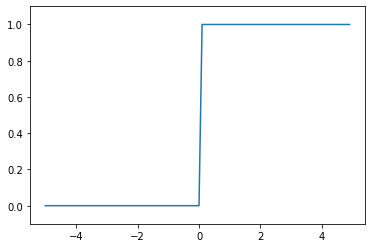

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def step_funtion(x):
  return np.array( x > 0 ,dtype = np.int)

x = np.arange(-5.0,5.0,0.1) #-5.0에서 5.0전까지 0.1 간격으로 넘파이 배열 생성
y = step_funtion(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

#3.2.4시그모이드 함수 구현하기


In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.array([-0.1,1.0,2.0])
sigmoid(x)

array([0.47502081, 0.73105858, 0.88079708])

인수가 넘파이 배열이라도 올바른 결과가 나온다. 
브로드캐스트 기능을 통해 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것 

In [ ]:
t= np.array([1.0,2.0,3.0])
1.0 + t

array([2., 3., 4.])

In [ ]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

스칼라값과 넘파이 배열 사이의 수치연산, 연산 결과가 넘파이 배열로 출력 

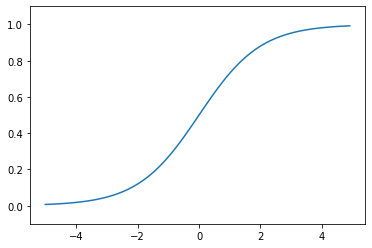

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

#3.2.5시그모이드 함수와 계단 함수 비교
시그모이드 함수 : 부드러운 곡선, 입력에 따라 출력이 연속적으로 변화
계단 함수 : 0을 경계로 출력이 갑자기 변화함 
즉, 퍼셉트론에서는 뉴런 사이에 0혹은 1이 흐르지만
신경망에서는 연속적인 실수가 흐른다. 
공통점 : 둘 다 입력이 작을 때의 출력은 0에 가깝고 입력이 커지면 출력이 1에 가까워 지는 구조이다. 입력이 아무리 작거나 커져도 출력은 0에서 1사이 이다.

#3.2.6 비선형함수
계단함수와 시그모이드 함수의 공통점은 비선형 함수라는 것.
선형 함수 : 변환기에 무언가를 입력했을 때 출력이 입력의 상수배 만큼 변하는 함수
비선형 함수 : 직선 1 개로는 그릴 수 없는 함수로, 선형이 아닌 함수.

신경망에서는 선형함수를 사용하지 않음
-> 선형 함수를 사용하면 층을 아뮈 깊게 해도 은닉층이 없는 네트워크로 같은 기능을 할 수 있다. p.75 예시 참고

#3.2.7 ReLU 함수
입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이하면 0을 출력한다. 


In [ ]:
def relu(x):
  return np.maximum(0,x)

#3.3.1 다차원 배열
:숫자의 집합. 숫자가 한 줄로 늘어선 것, 직사각형으로 늘어놓은 것, 3차원으로 늘어옿은 것, N차원으로 나열하는 것 등 ...

In [ ]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [ ]:
np.ndim(A) # 배열의 차원 수

1

In [ ]:
A.shape # 배열의 형상 

(4,)

In [ ]:
A.shape[0]

4

In [ ]:
# 2차원 배열
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B)

2

In [ ]:
B.shape

(3, 2)

행 : 배열의 가로 방향
열 : 배열의 세로 방향

# 3.3.2 행렬의 곱
행렬 곱 : 왼쪽 행렬의 행과 오른쪽 행렬의 열을 원소별로 곱하고 그 값들을 더해서 계산

In [ ]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [ ]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [ ]:
np.dot(A,B) #두 행렬의 곱 계산

array([[19, 22],
       [43, 50]])

np.dot()
입력이 1차원 배열이면 벡터를
2차원 배열이면 행렬곱을 계산한다.

행렬에서 피연산자의 순서가 다르면 결과값이 다르게 나온다. 

In [ ]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [ ]:
B=np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [ ]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [ ]:
C = np.array([[1,2],[3,4]])
C.cshaoe
#. 행렬의 첫 차원과 행렬 C의 0번째 차원이 다르기 대문에

AttributeError: ignored

In [ ]:
A.shape

(2, 3)

In [ ]:
np.dot(A,C)

ValueError: ignored

In [ ]:
A =np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [ ]:
B = np.array([7,8])
B.shape

(2,)

In [ ]:
np.dot(A,B)

array([23, 53, 83])

#.3,3,3 신경망에서의 행렬 곱
편향과 활성화 함수를 생략, 가중치만 가진 신경망 구현

In [ ]:
X = np.array([1,2])
X.shape

(2,)

In [ ]:
W= np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [ ]:
W.shape

(2, 3)

In [ ]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


#3.4 3층 신경망 구현하기

입력부터 출력까지의 순방향 처리 구현
넘파이의 다차원 배열 사용. 

신경망에서의 계산을 행렬 계산으로 정리 할 수 있다는 것.
신경망 각 층의 계산은 행렬의 곱으로 처리 할 수 있다. 

가중치 오른쪽 아래의 인덱스 번호는 '다음층 번호, 앞 층 번호' 순으로 !!


In [ ]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1 # B1은 편향

(2, 3)
(2,)
(3,)


In [ ]:
Z1 = sigmoid(A1)
print(A1) 
print(Z1)


[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) +B2 # 편향 더하기
Z2 = sigmoid(A2)


(3,)
(3, 2)
(2,)


In [ ]:
def identity_function(x): #항등함수 : 입력 그대로 출력 
  return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array ([0.1,0.2])

A3 = np.dot(Z2,W3)+B3
Y = identity_function(A3)

출력층의 활성화 함수는 문제의 성질에 따라 다르게 사용
회귀 - 항등함수 , 2클래스 분류 - 시그모이드 함수, 다중클래스 분류 - 소프트맥스 함수 사용이 일반적

#3.4.3 구현 정리


In [ ]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1'] = np.array([0.1,0.2,0.3])
  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2'] = np.array([0.1,0.2])
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['b3'] = np.array([0.1,0.2])

  return network

def forward(network, x):
  W1,W2,W3 = network['W1'],network['W2'],network['W3']
  b1,b2,b3 = network['b1'],network['b2'],network['b3']

  a1 = np.dot(x,W1)+b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2)+b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3)+b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y) 


NameError: ignored